In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML;

# Frequentism

Over the next few weeks we'll discuss the frequentist view of statisitics and what kinds of questions it is suited to answering.

## Recap of The Frequentist View

The frequentist view is summarized by this quote from the first pages of a probability textbook:

>Suppose an experiment under consideration can be repeated any number of times, so that, in principle at least, we can produce a whole series of “independent trials under identical conditions” in each of which, depending on chance, a particular event $A$ of interest either occurs or does not occur. 

>Let $n$ be the total number of experiments in the whole series of trials, and let $n(A)$ be the number of experiement in which $A$ occurs. Then the ratio $n(A)/n$ is called the relative frequency of the event $A.$ 

> It turns out that the relative frequencies observed in different series of trials are virtually the same for large $n,$ clustering about some constant $P[A],$ which is called the **probability of the event $A.$**

Y. A. Rozanov. _Probability Theory: A Concise Course._ 1969.

The key idea in the above definition is to be able to:

> produce a whole series of “independent trials under identical conditions” 


You can think of it as treating each event as a sort of idealized coin-flip.

In other words, when we use the frequentist view, we will generally be thinking of a somewhat abstract situation where we __assume__ that "independent trials under identical conditions" is a good description of the situation.

This is assumption is often shortened as "i.i.d." "iid" or "IID"

## Generative vs Data Driven Models

### Generative model (top down)
You know the rules that the system follows.

### Data driven model (bottom-up)
You observe properties of the system from data.

## Coin Flipping Through Both Lenses: Top-Down

### Generative model of coin flipping
In this model, you **know the rules that the system follows**. 

Flipping a fair coin is simply a Bernoulli trial with an equal probabilty of Heads or Tails. As we learned before, a Bernoulli trial is a single outcome of a binomial disribution. For a generative model we know the true probability of *p* of heads or tails.

In [2]:
np.random.binomial(n=1, p = 0.5, size=15)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

## Coin Flipping Through Both Lenses: Bottom-Up

### Data driven model of coin flipping
In this model, you **observe properties of the system from data.**

That is, we start with data, and find parameters that describe it. 

In general we want to find parameters that give us the "maximum likelihood" of describing the data. We will discuss this in a lot of detail later, but in this special case you can intuively estimate the probablity $\hat{p}$ of getting heads.

If we were handed the results of 100 coin flips as follows:

| Tails | Heads |
| ----- | ----- |
| 54    | 46    |


We can calculate the probablity $\hat{p}$ of getting heads from the data:

$$\hat{p} = \frac{46}{54+46} = 0.46$$

## Bringing Generative and Data-driven Models Together
We can bring the two concepts together by looking at the likelihoods of many possible values of *p* using generative models. 

The generatative model that best matches our data should correspond to a value of *p* that matches our data-driven estimate $\hat{p}$. 

In other words, we can look at the likelihoods of many possible generative models and find the maximum. 

Recall from before that for a binomal distrubtion:

$$P[X=k] = \binom{N}{k}\; p^k\; (1-p)^{N-k}.$$

So lets set N=100 (total number of coin flips) and k=46 (total number of heads) and try lots of different values of *p*. That will tell us the likelihood of seeing 46 heads in 100 coin flips given that probability.

In [3]:
from scipy.stats import binom 
# import binomial distribution from SciPy
probs  =  np.arange(start=0, stop=1, step=0.01) 
# create an array of probabilities between 0 and 1
likelihood = [binom.pmf(k=46, n=100, p = prob) for prob in probs] 
#calculate PMF for each probability

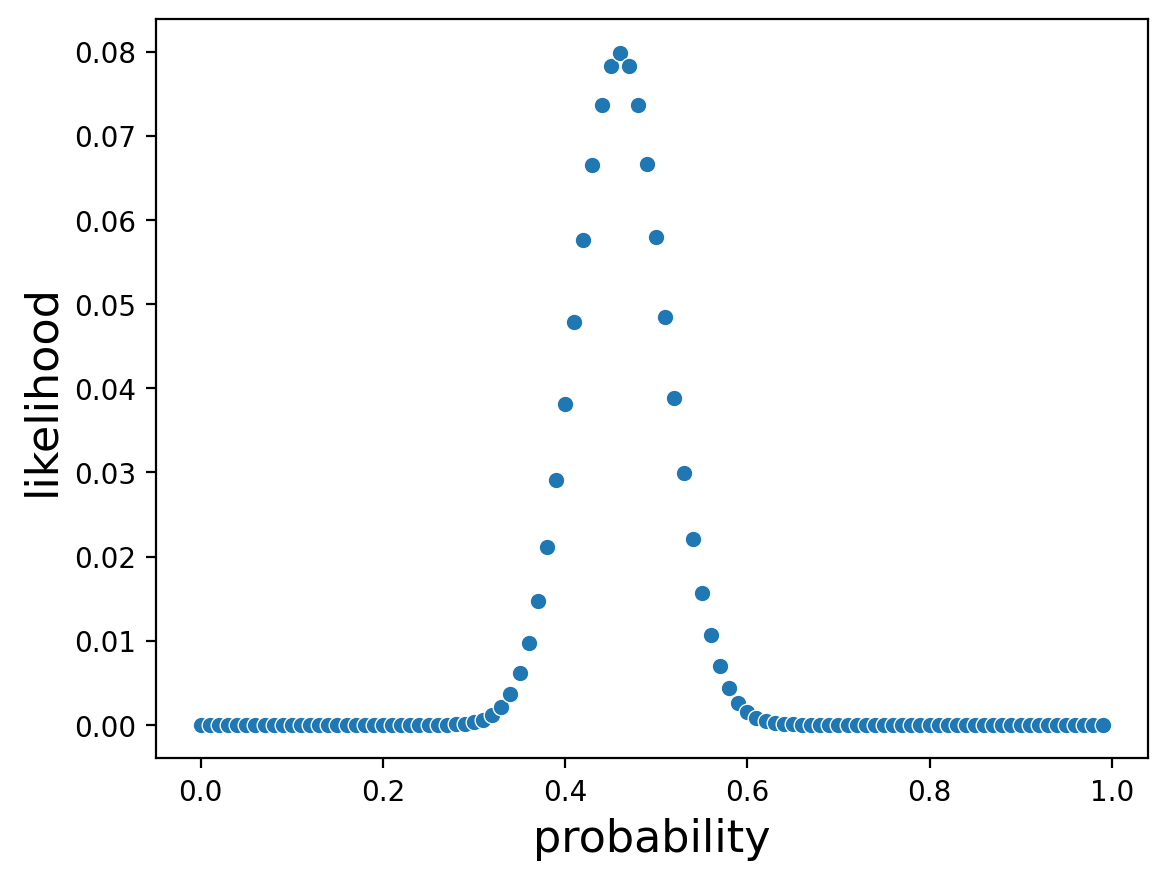

In [4]:
#plot
plt.figure()
sns.scatterplot(x=probs, y=likelihood);
plt.xlabel('probability', fontsize=16);
plt.ylabel('likelihood', fontsize=16);

And what value of *p* gave us the maximum likelihood?

In [5]:
probs[np.argmax(likelihood)]

0.46

## Is the coin fair?

But wait a second! Don't you expect a coin to be 50/50 heads and tails? Why aren't we seeing $p=0.5$?

Were the coin flips we observed unsual if the coin was fair? What if we had observed:

| Tails | Heads |
| ----- | ----- |
| 23    | 77    |

or:

| Tails | Heads |
| ----- | ----- |
| 540   | 460   |

Do we still believe the coin is fair in those cases?

Let's assume we have a fair coin (i.e., $p=0.5$).

If we toss a fair coin 100 times, we can see based on the binomial distribution how often we expect to see heads. Note we are now varying *k* with a fixed *p* and *N*.

In [6]:
#test every k from 0 to 100
counts = np.arange(start=0, stop=100, step=1) 
#100 coin flips
probs = [binom.pmf(k = count, n=100, p = .5) for count in counts]

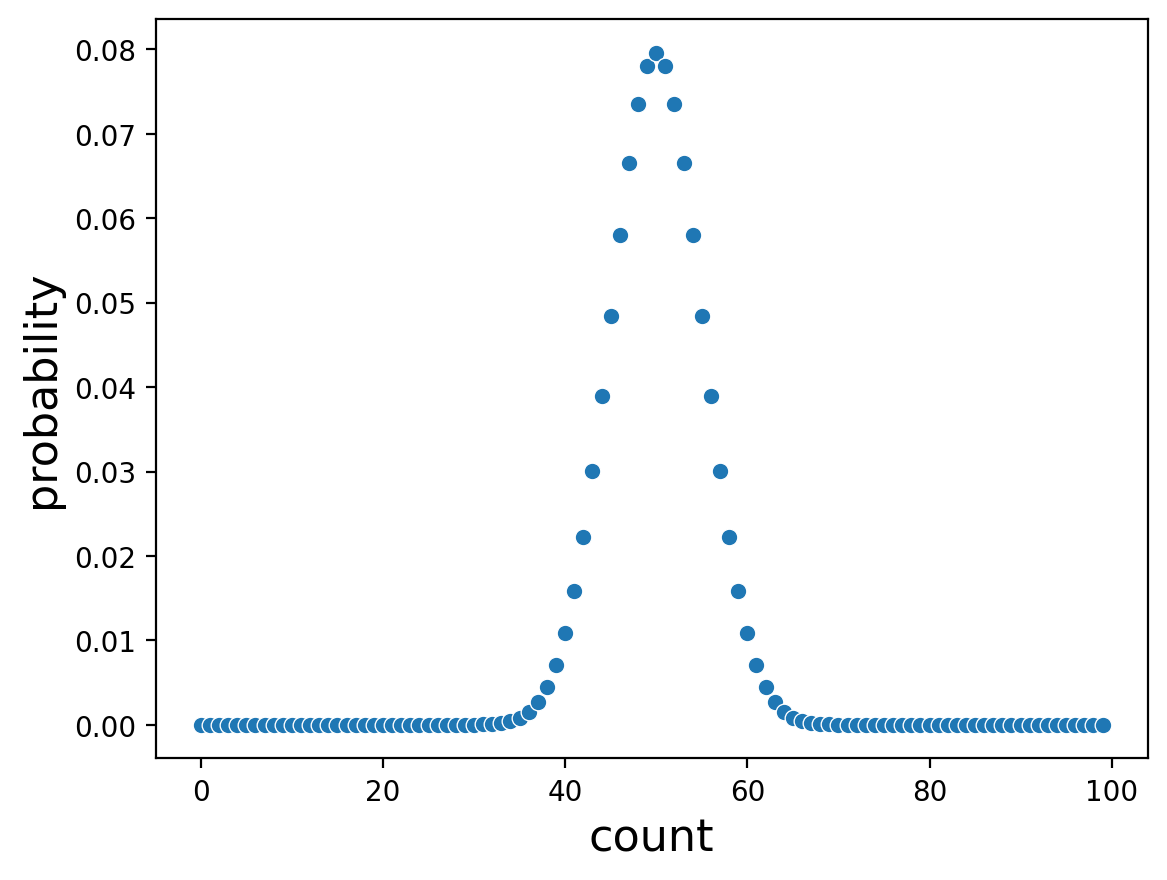

In [7]:
#plot
plt.figure()
sns.scatterplot(x=counts, y=probs);
plt.xlabel('count', fontsize=16);
plt.ylabel('probability', fontsize=16);

Or tossing a coin 1000 times:

In [8]:
counts = np.arange(start=0, stop=1000, step=1) #Test every k from 0 to 1000
probs = [binom.pmf(k = count, n=1000, p = .5) for count in counts] #1,000 coin flips

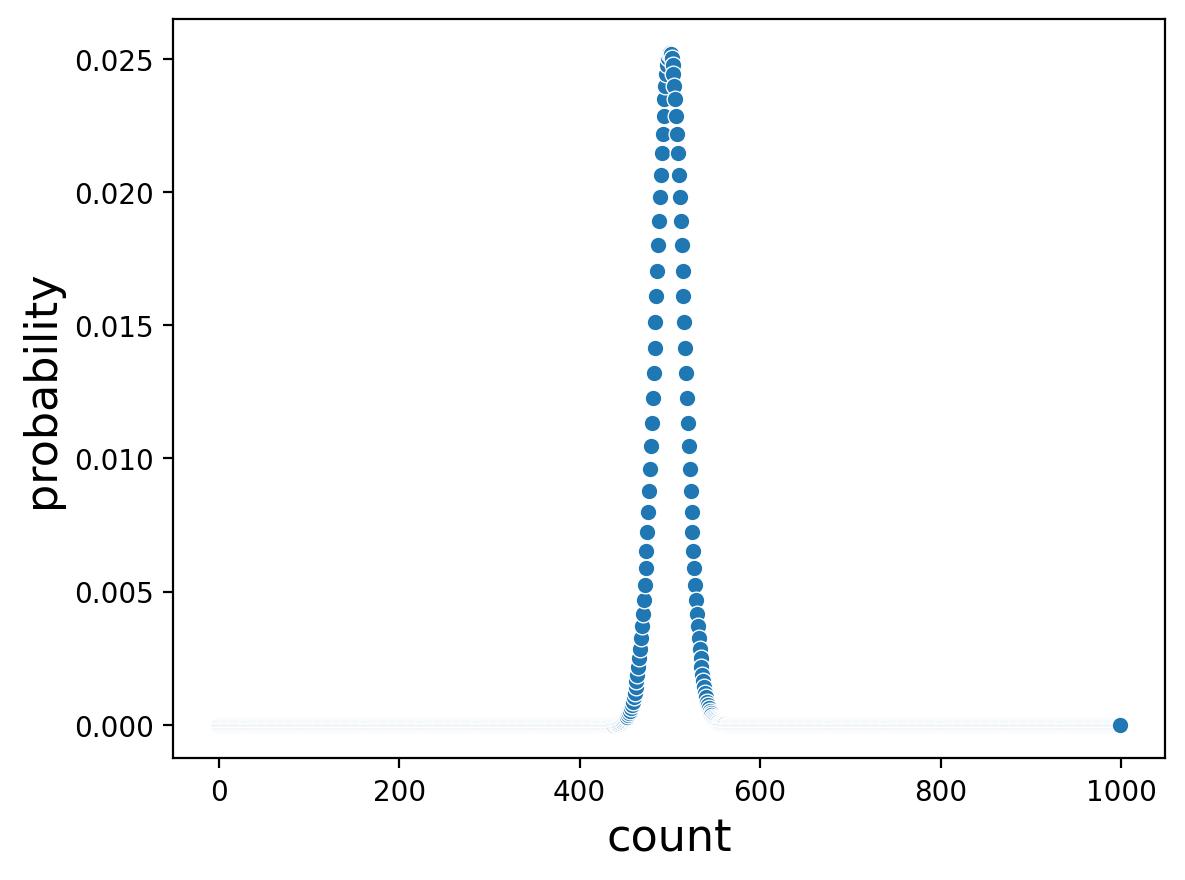

In [9]:
#plot
plt.figure()
sns.scatterplot(x=counts, y=probs);
plt.xlabel('count', fontsize=16);
plt.ylabel('probability', fontsize=16);

Notice that the distribution of counts looks narrower with 1,000 coin tosses.

And where do our observed counts fall on these distrubtions generated by assuming that the coin is fair?

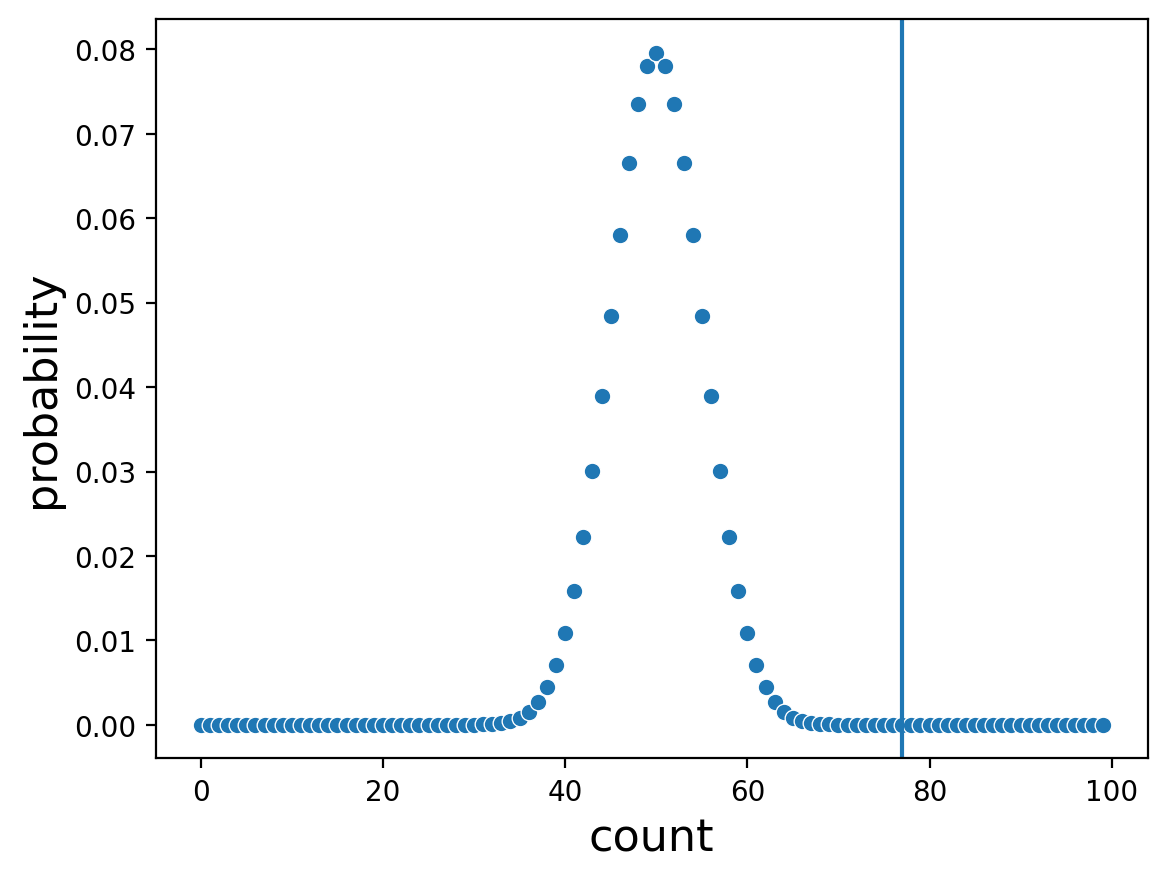

In [10]:
counts = np.arange(start=0, stop=100, step=1) #Test every k from 0 to 100
probs = [binom.pmf(k = count, n=100, p = .5) for count in counts] #100 coin flips
#plot
plt.figure()
sns.scatterplot(x=counts, y=probs);
plt.xlabel('count', fontsize=16);
plt.ylabel('probability', fontsize=16);
plt.axvline(77); #Observed 77 heads

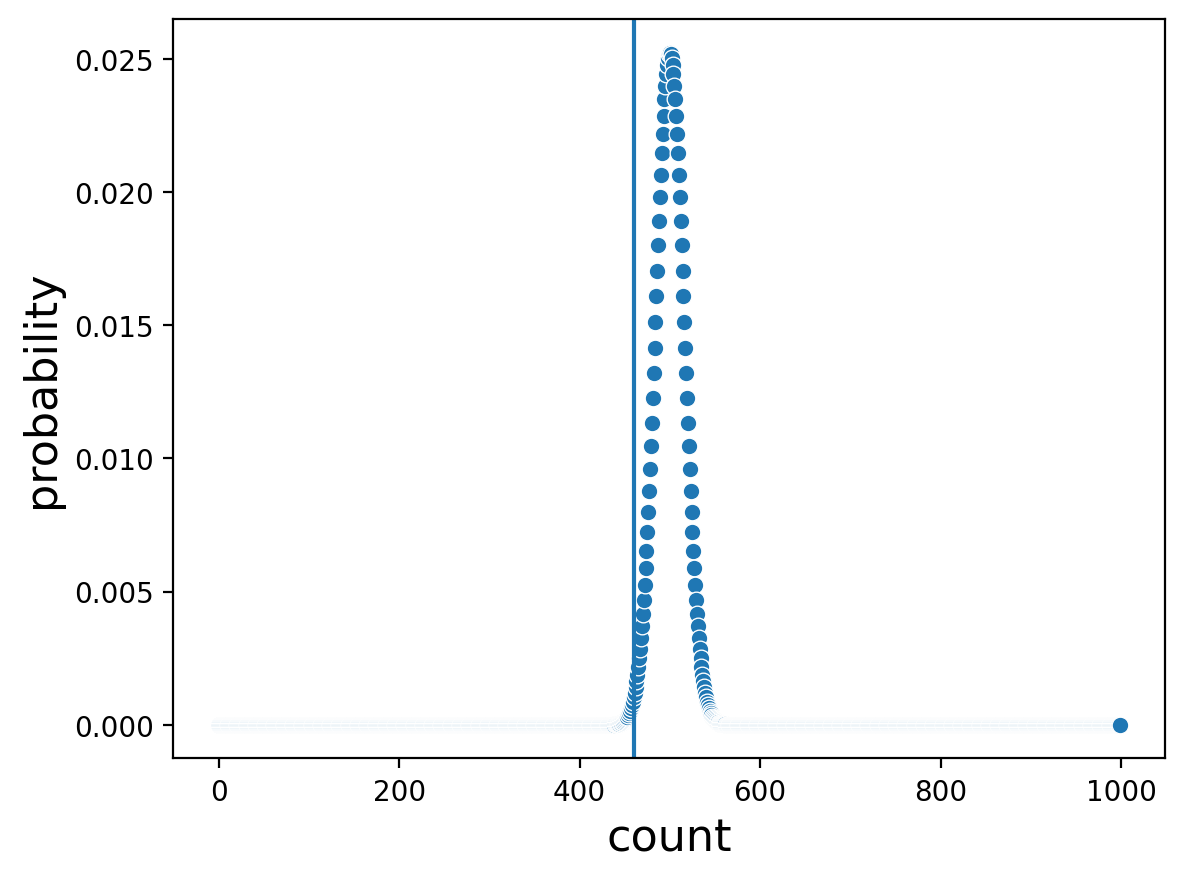

In [11]:
counts  =  np.arange(start=0, stop=1000, step=1) #Test every k from 0 to 1000
probs = [binom.pmf(k = count, n=1000, p = .5) for count in counts] #1,000 coin flips
#plot
plt.figure()
sns.scatterplot(x=counts, y=probs);
plt.xlabel('count', fontsize=16);
plt.ylabel('probability', fontsize=16);
plt.axvline(460); #Observed 460 heads

In the first plot we see that observing 77 heads after 100 coin tosses does look pretty unusual if we assume we are tossing a fair coin.  It's not very often that we see that many heads (though it does happen!).

Interestingly, in the second plot we see that observing 460 heads after 1,000 coin tosses, assuming a fair coin, is also a bit unusual, even though the number doesn't seem that far from 50/50.

In a classical frequentist setup, we have established a **null hypthesis**, usually denoted $H_0$. In our case, our null hypthesis is that we are observing tosses of a fair coin. 

In each case, we can now say how often, under our **null hypthesis** that the coin is fair, would we expect to see the coin turn up heads as often as we did, simply by summing up the probabilities of all the values as or more extreme.

In [12]:
sum(binom.pmf(k = count, n=100, p = .5) for count in np.arange(start=77, stop=100, step=1))

2.756790387925029e-08

So there's less than a 1 in a million chance of seeing that many heads in 100 coin flips if the coin is fair! Makes me wonder if it was a fair coin...

What we're really just doing is calculating the cumulative density of the null distribution up to our observed event. We can get these numbers directly as well:

In [13]:
binom.cdf(k = 76, n = 100, p = .5) #Cummulative Distribution Function

0.9999999724320962

That doesn't look right, what's going on here?

In [14]:
1-binom.cdf(k = 76, n = 100, p = .5) #Cummulative Distribution Function

2.7567903848613184e-08

Now we see the same result. It's important to be sure not only what the null distribution is, but which tail of the distribution you are considering.

But remember, the question we actually want to answer is if the coin is fair, not just how likely we are to see 77 heads under the null hypothesis that the coin is fair. That means what we actually care about is "what is the probability of seeing a result this extreme?" beause we don't actually care which direction we obsereve extreme results from (many heads or few heads) for fairness.

In [15]:
1-binom.cdf(k = 76, n = 100, p = .5) #one tail

2.7567903848613184e-08

In [16]:
binom.cdf(k = 23, n = 100, p = .5) #the other tail

2.756790387925026e-08

In [17]:
1 - binom.cdf(k = 76, n = 100, p = .5) + binom.cdf(k = 23, n = 100, p = .5) #both tails

5.5135807727863445e-08

Now we can say how likely it was that the coin was not fair. If we assume that our coin flips came from a fair coin, we would only see a result as extreme as 77 heads in 100 flips less than one in a million times

Looking for a biased coin is one of the most simple problems we can solve with a frequentist approach:
* We know coin flips are independent and identically distributed (iid)
* We know the generative model for coin flipping

These make it very easy to generate a null distribution and test a null hypothesis. However, things get trickier, so we'll need to learn the central limit theorem and all about sampling.